# Project 4: Web Scraping Job Postings

## Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries. 

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

---

## Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to answer the two questions described above.

### QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

### QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


### BONUS PROBLEM

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

---

## Requirements

1. Scrape and prepare your own data.

2. **Create and compare at least two models for each section**. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).
   - Section 1: Job Salary Trends
   - Section 2: Job Category Factors

3. Prepare a polished Jupyter Notebook with your analysis for a peer audience of data scientists. 
   - Make sure to clearly describe and label each section.
   - Comment on your code so that others could, in theory, replicate your work.

4. A brief writeup in an executive summary, written for a non-technical audience.
   - Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

#### BONUS

5. Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions.

6. Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

---

## Suggestions for Getting Started

1. Collect data from [Indeed.com](www.indeed.com) (or another aggregator) on data-related jobs to use in predicting salary trends for your analysis.
  - Select and parse data from *at least 1000 postings* for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (e.g. title, location, department, etc).
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Discover which features have the greatest importance when determining a low vs. high paying job.
  - Your Boss is interested in what overall features hold the greatest significance.
  - HR is interested in which SKILLS and KEY WORDS hold the greatest significance.   
4. Author an executive summary that details the highlights of your analysis for a non-technical audience.
5. If tackling the bonus question, try framing the salary problem as a classification problem detecting low vs. high salary positions.

---

In [1]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dataanalystdf = pd.read_csv("Data_Analyst_MCF.csv", index_col=0)
dataengineerdf = pd.read_csv("Data_Engineer_MCF.csv", index_col=0)
dataanalyticsdf = pd.read_csv("Data_Analytics_MCF.csv", index_col=0)
datascientistdf = pd.read_csv("Data_Scientist_MCF.csv", index_col=0)
datasciencedf = pd.read_csv("Data_Science_MCF.csv", index_col=0)
datawarehousedf = pd.read_csv("DWH_MCF.csv", index_col=0)
databasedf = pd.read_csv("DB_MCF.csv", index_col=0)
datamanagerdf = pd.read_csv("Data_Manager_MCF.csv", index_col=0)
analyticsdf = pd.read_csv("Analytics_MCF.csv", index_col=0 ) 
architectdf = pd.read_csv("Data_Architect_MCF.csv", index_col=0)
etldf = pd.read_csv("ETL_MCF.csv", index_col=0)
businessintelligencedf = pd.read_csv("BI_MCF.csv", index_col=0 )
bigdatadf = pd.read_csv("Big_Data_MCF.csv", index_col=0)                                     
artificialintelligencedf = pd.read_csv("AI_MCF.csv", index_col=0)
deeplearndf = pd.read_csv("Deep_Learning_MCF.csv", index_col=0)
machinelearndf = pd.read_csv("ML_MCF.csv", index_col=0)
nlpdf = pd.read_csv("NLP_MCF.csv", index_col=0)
researchscientistdf = pd.read_csv("Research_Scientist_MCF.csv", index_col=0)

jobs = pd.concat([ dataanalystdf, dataengineerdf, dataanalyticsdf, datascientistdf, datasciencedf, datawarehousedf, \
                  databasedf, datamanagerdf, analyticsdf, architectdf, etldf, businessintelligencedf, bigdatadf, \
                  artificialintelligencedf, deeplearndf, machinelearndf, nlpdf, researchscientistdf])
jobs.to_csv("mycareersfuture.csv")

In [3]:
df = pd.read_csv("mycareersfuture.csv", index_col=0)

In [4]:
df.shape

(3094, 18)

In [5]:
# Dropping rows with either blank or 0 salary information
df = df.drop(index=df[df["Min Salary"].isna()].index).reset_index(drop=True)
df = df.drop(index=df[df["Min Salary"] == 0].index).reset_index(drop=True)

# Dropping duplicates with exact same Job ID from web scraping
df = df.drop_duplicates(["Job ID"]).reset_index(drop=True)
df = df.drop(["Job ID", "URL"], axis=1)

# Dropping duplicates which have same Job Title from same Company and Job Type
df = df.drop_duplicates(["Job Title", "Job Type", "Company Name"]).reset_index(drop=True)

In [6]:
# Total number of records remaining after removing duplicates and blank rows
len(df)

1384

In [7]:
# Removing special characters in every text in Job Description
specialchar = ["\xa0", "\uf0b7", "\t", "· ", "\r\n"]
for c in specialchar:
    df["Job Description"] = df["Job Description"].map(lambda x: x.replace(c, "").lower())

In [8]:
# Creating Mean Salary column as the aggregated figure to classify
df["Mean Salary"] = (df["Max Salary"] + df["Min Salary"])/2

In [9]:
# Checking if there are any duplicated unique Job Titles
df["Job Title"].value_counts()

Data Scientist                                                  33
Data Engineer                                                   24
Software Engineer                                               11
Data Analyst                                                    10
Business Analyst                                                 9
Database Administrator                                           6
Full Stack Developer                                             6
Software Developer                                               6
Human Resource Executive                                         6
Lead Data Scientist                                              5
Manager                                                          5
Marketing Executive                                              5
Senior Software Developer                                        5
Operations Executive                                             4
Technical Consultant                                          

In [10]:
# Salary > 40k a month is quite unlikely realistically, to recognize as Annual salary instead
df.loc[df[df["Mean Salary"] > 40000].index, "Salary Paid"] = "Annually"
df.loc[df[df["Salary Paid"] == "Annually"].index, "Mean Salary"] = df.loc[df[df["Salary Paid"] == "Annually"].index, "Mean Salary"].apply(lambda x: x/12)
df.loc[df[df["Salary Paid"] == "Annually"].index, "Salary Paid"] = "Monthly"
# Salary Paid unknown, imputed as Monthly
df.loc[df[df["Salary Paid"].isna()].index, "Salary Paid"] = "Monthly"

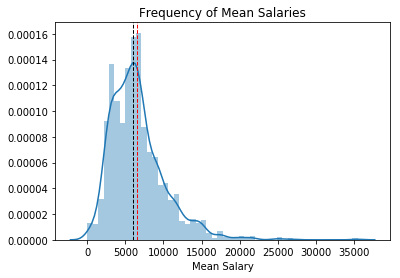

In [11]:
# Plotting the distribution of Mean Salary after processing
sns.distplot(df["Mean Salary"])
plt.title("Frequency of Mean Salaries")
plt.axvline(df["Mean Salary"].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df["Mean Salary"].median(), color='black', linestyle='dashed', linewidth=1)
plt.show()

#### For the distribution of  Mean Salaries, the mean (red line) is greater than the median (black line), due to the presence of some extreme values.
- In this case, I will classify Mean Salary into 2 classes.
- Class 0 represents below or equal Median, Class 1 represents above Median.
- Reason is to identify if model can predict the correct class given certain features.

In [12]:
print("Median:", df["Mean Salary"].median(), end=", ")
print("Mean:", df["Mean Salary"].mean())

Median: 6000.0, Mean: 6582.234043834296


In [13]:
df["Salary_Category"] = 0
# Code for 2 categories (Above Median = 1 / Below & Equals Median = 0)
df.loc[df[df["Mean Salary"] > df["Mean Salary"].median()].index, "Salary_Category"] = 1

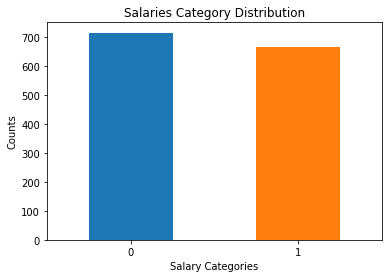

In [14]:
# Plot to show the distribution of Salary Classes
df["Salary_Category"].value_counts().plot.bar()
plt.title("Salaries Category Distribution")
plt.xlabel("Salary Categories")
plt.ylabel("Counts")
plt.xticks(rotation=0)
plt.show()

In [15]:
print("[0]", len(df[df["Salary_Category"] == 0]) / len(df["Salary_Category"]), end=", ")
print("[1]", len(df[df["Salary_Category"] == 1]) / len(df["Salary_Category"]))

[0] 0.5173410404624278, [1] 0.48265895953757226


In [16]:
df.describe()

,Min Salary,Max Salary,Contract,Internship,Temporary,Permanent,Mean Salary,Salary_Category
count,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000
mean,6983.350434,10923.443642,0.182803,0.008671,0.009393,0.440029,6582.234044,0.482659
std,13540.037234,21374.532350,0.386645,0.092745,0.096496,0.496570,3613.102381,0.499880
min,7.000000,9.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,3000.000000,5000.000000,0.000000,0.000000,0.000000,0.000000,4000.000000,0.000000
50%,5000.000000,7500.000000,0.000000,0.000000,0.000000,0.000000,6000.000000,0.000000
75%,6500.000000,10000.000000,0.000000,0.000000,0.000000,1.000000,8000.000000,1.000000
max,164500.000000,277000.000000,1.000000,1.000000,1.000000,1.000000,35500.000000,1.000000


In [17]:
# Dummy Coding Job Levels
list1 = ['Executive', 'Fresh/entry level', 'Junior Executive', 'Manager', 'Middle Management', 'Non-executive', 'Professional', 'Senior Executive', 'Senior Management']
for count, x in enumerate(df["Job Level"].apply(lambda x: x.split(", "))):
    for y in list1:
        if y in x:
            df.loc[count, y] = int(1)
        else:
            df.loc[count, y] = int(0)

In [18]:
# Dropping not required columns
df.drop(columns=["Min Salary", "Max Salary", "Salary Paid", "Date Posted", "Job Level"], inplace=True)
df

,Job Title,Job Type,Company Name,Job Location,Job Industry,Contract,Internship,Temporary,Permanent,Job Description,...,Salary_Category,Executive,Fresh/entry level,Junior Executive,Manager,Middle Management,Non-executive,Professional,Senior Executive,Senior Management
0,Data Analyst,Full Time,INTERNATIONAL SOS TECHNOLOGY SERVICES PTE. LTD.,"ODEON TOWERS, 331 NORTH BRIDGE ROAD 188720",Information Technology,0,0,0,0,in our digital innovation services centre (dis...,...,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Data Analyst,Permanent,ASCENTIS PTE. LTD.,3015A UBI ROAD 1 408705,Information Technology,0,0,0,1,data analyst job description: the role will be...,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Datawarehouse Consultant,Full Time,R SYSTEMS (SINGAPORE) PTE LIMITED,"HOI HUP BUILDING, 16 JALAN KILANG 159416",Information Technology,0,0,0,0,experience working with business users to con...,...,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Data analyst,Full Time,TRAKOMATIC PTE. LTD.,"ALICE@MEDIAPOLIS, 29 MEDIA CIRCLE 138565",Information Technology,0,0,0,0,the retail data analyst will lead and perform ...,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Data Analyst,Full Time,GUMI ASIA PTE. LTD.,"CONNEXIS, 1 FUSIONOPOLIS WAY 138632",Others,0,0,0,0,perform evaluations and problem investigation...,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,"Senior Associate, Data and Analytics, Advisory",Full Time,ERNST & YOUNG ADVISORY PTE. LTD.,1 RAFFLES QUAY 048583,Consulting,0,0,0,0,"powered by big data and advanced technologies,...",...,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,"Associate, Advisory Data and Analytics",Full Time,ERNST & YOUNG ADVISORY PTE. LTD.,1 RAFFLES QUAY 048583,Consulting,0,0,0,0,"powered by big data and advanced technologies,...",...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Data Analyst,Contract,FUTUREX TECHNOLOGIES PTE. LTD.,"GERMAN CENTRE, 25 INTERNATIONAL BUSINESS PARK ...",Information Technology,1,0,0,0,the successful candidate will be responsible f...,...,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Senior Data Scientist,Full Time,SINGAPORE POWER LIMITED,"SP GROUP BUILDING, 2 KALLANG SECTOR 349277",Information Technology,0,0,0,0,why work for us we power the nation. make the...,...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,"Data Analyst, Transformation Project",Contract,CHANDLER MACLEOD GROUP PTE. LTD.,"KECK SENG TOWER, 133 CECIL STREET 069535",Information Technology,1,0,0,0,"23 months contract global bank, based in cbd ...",...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
# Dummy Coding Job Industries
list2 = []
# Split jobs with multiple industries into a single list of unique industry 
for x in df["Job Industry"].unique():
    for z in range(len(x.split(", "))):
        if x.split(", ")[z] not in list2:
            list2.append(x.split(", ")[z])   
            
# for each df rows, go through each job industry, flag 1  when found a matching industry else 0
for count, x in enumerate(df["Job Industry"].apply(lambda x: x.split(", "))):
    for y in list2:
        if y in x:
            df.loc[count, y] = int(1)
        else:
            df.loc[count, y] = int(0)

------
### Start of Modelling

#### QUESTION 1: Factors that impact salary
- Finding out what factors impact salary, through a classification problem.
- In this case, I will assign `Salary_Category` above the median as 1, `Salary_Category` below or equals the median as 0.
- With the `Salary_Category` category, I will try to use selected features to identify if they impact salary.

Out of the several features I have obtained, I will attempt to build simple models first before expanding with additional features to see if the additional features better predict `Salary_Category`

For a start, I will use `Job Level` as factor that impacts salary.

In [20]:
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Defining stop words for NLP
stop = stopwords.words('english')
stop += ["data"]  # to add on more stopwords

### Simple Case 1: Using `Job Levels` to see if it can predict `Salary_Category`

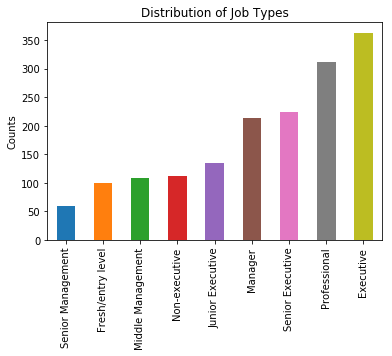

In [22]:
df[['Executive', 'Fresh/entry level', 'Junior Executive', 'Manager', 'Middle Management', 'Non-executive', \
         'Professional', 'Senior Executive', 'Senior Management']].sum().sort_values().plot.bar()
ax = plt.gca()
plt.title("Distribution of Job Types")
plt.ylabel("Counts")
plt.xticks()
plt.show()

#### Overall graph visually looks like certain features within the Job Types may be able to explain salary differences
- I will investigate using a few models to see if the models used can predict the Salary category correctly.

In [23]:
# Defining the features for Case 1
features1 = ['Executive', 'Fresh/entry level', 'Junior Executive', 'Manager', 'Middle Management', 'Non-executive', 'Professional', 'Senior Executive', 'Senior Management']
X1 = df[features1]
y1 = df["Salary_Category"]

In [24]:
X_train1, X_test1, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=91)

In [25]:
# Baseline - Majority Class (0) - Indicates how likely to predict the correct value based on majority class randomly
print("Baseline:", len(df[df["Salary_Category"] == 0])/len(df["Salary_Category"]))

Baseline: 0.5173410404624278


##### Using Logistic Regression

In [26]:
lr = LogisticRegression(solver='liblinear', random_state=91)
C_vals = [.0001,.001,.01,.05, .1,.12,.13,.135,.15,.16,.17,1,3,5,10,20,50,100]
penalties = ['l1','l2']

# Using GridSearch to find best penalty and C parameters
gs = GridSearchCV(lr, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=5)
gs.fit(X_train1, y_train)
print(gs.best_params_)
y_pred_lr1 = gs.best_estimator_.predict(X_test1)
y_predp_lr1 = gs.best_estimator_.predict_proba(X_test1)[:, 1]
print(classification_report(y_test, y_pred_lr1, target_names=["Below Median","Above Median"]))

{'C': 0.01, 'penalty': 'l2'}
              precision    recall  f1-score   support

Below Median       0.76      0.65      0.70       219
Above Median       0.66      0.77      0.71       197

   micro avg       0.70      0.70      0.70       416
   macro avg       0.71      0.71      0.70       416
weighted avg       0.71      0.70      0.70       416



In [27]:
acc_lr1 = accuracy_score(y_pred_lr1, y_test)
print("Accuracy:", acc_lr1)
roc_lr1 = roc_auc_score(y_test, y_predp_lr1)
print("ROC_AUC:", roc_lr1)
print("Cross Val:", cross_val_score(gs.best_estimator_, X_train1, y_train, cv=5).mean())

Accuracy: 0.7043269230769231
ROC_AUC: 0.7327260505759914
Cross Val: 0.7137889302976638


##### Using Random Forest

In [28]:
rf = RandomForestClassifier(random_state=91)
rf.fit(X_train1, y_train)
y_pred_rf1 = rf.predict(X_test1)
y_predp_rf1 = rf.predict_proba(X_test1)[:,1]
print(classification_report(y_test, y_pred_rf1, target_names=["Below Median","Above Median"]))

              precision    recall  f1-score   support

Below Median       0.76      0.65      0.70       219
Above Median       0.67      0.77      0.72       197

   micro avg       0.71      0.71      0.71       416
   macro avg       0.71      0.71      0.71       416
weighted avg       0.72      0.71      0.71       416



In [29]:
acc_rf1 = accuracy_score(y_pred_rf1, y_test)
print("Accuracy:", acc_rf1)
roc_rf1 = roc_auc_score(y_test, y_predp_rf1)
print("ROC_AUC:", roc_rf1)
print("Cross Val:", cross_val_score(rf, X_train1, y_train, cv=5).mean())

Accuracy: 0.7091346153846154
ROC_AUC: 0.7555107433419095
Cross Val: 0.7168871101834084


In [30]:
features_importance = pd.DataFrame(rf.feature_importances_, index=X_train1.columns,
                                  columns = ["importance"]).sort_values("importance", ascending = False)
features_importance

,importance
Junior Executive,0.239000
Executive,0.171981
Fresh/entry level,0.155085
Professional,0.087981
Senior Management,0.085051
Non-executive,0.077965
Senior Executive,0.064126
Middle Management,0.061433
Manager,0.057378


In [31]:
# Tuning of RandomForest model for better results
params = {
    'n_estimators' : range(1, 11, 2),
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [1, 2, 3, None]
}

rf_gs = GridSearchCV(rf, param_grid=params, cv=3, n_jobs=-1, verbose=1)
rf_gs.fit(X_train1, y_train)

print(rf_gs.best_params_)
print(rf_gs.best_score_)

# Score test data with tuned parameters 
rfc2 = RandomForestClassifier(n_estimators=rf_gs.best_params_['n_estimators'], \
                              criterion=rf_gs.best_params_['criterion'], \
                              max_depth=rf_gs.best_params_['max_depth'], n_jobs=-1, random_state=29, verbose=1)
rfc2.fit(X_train1, y_train)

print('Score on test data: {}'.format(rfc2.score(X_test1, y_test)))

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  97 out of 120 | elapsed:    7.6s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished


{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 5}
0.7086776859504132
Score on test data: 0.7115384615384616


In [32]:
print(classification_report(y_test, rfc2.predict(X_test1), labels=[0,1], target_names=['Below Median', 'Above Median']))

              precision    recall  f1-score   support

Below Median       0.77      0.65      0.70       219
Above Median       0.67      0.78      0.72       197

   micro avg       0.71      0.71      0.71       416
   macro avg       0.72      0.72      0.71       416
weighted avg       0.72      0.71      0.71       416



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished


##### Using K Nearest Neighbours to classify

In [33]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train1, y_train)
y_pred_kn1 = knn.predict(X_test1)
y_predp_kn1 = knn.predict_proba(X_test1)[:,1]
print(classification_report(y_test, y_pred_kn1, target_names=["Below Median","Above Median"]))

              precision    recall  f1-score   support

Below Median       0.62      0.47      0.54       219
Above Median       0.54      0.68      0.60       197

   micro avg       0.57      0.57      0.57       416
   macro avg       0.58      0.58      0.57       416
weighted avg       0.58      0.57      0.57       416



In [34]:
acc_kn1 = accuracy_score(y_pred_kn1, y_test)
print("Accuracy:", acc_kn1)
roc_kn1 = roc_auc_score(y_test, y_predp_kn1)
print("ROC_AUC:", roc_kn1)
print("Cross Val:", cross_val_score(knn, X_train1, y_train, cv=5).mean())

Accuracy: 0.5697115384615384
ROC_AUC: 0.5719931390955659
Cross Val: 0.5598003339181695


In [35]:
pd.DataFrame([[acc_lr1, acc_rf1, acc_kn1],
               [roc_lr1, roc_rf1, roc_kn1]],
            columns=["LogisticReg", "RandomForest", "KNearest"],
            index=["Accuracy Score", "ROC AUC Score"]).rename_axis('Summary:', axis=1)

Summary:,LogisticReg,RandomForest,KNearest
Accuracy Score,0.704327,0.709135,0.569712
ROC AUC Score,0.732726,0.755511,0.571993


#### Case 1 Conclusion:
- Random Forest model gave the best accuracy score of 0.709, based on Job Levels as predictor variables.  Gridsearch for Random Forest barely improved the performance. 
- With the 1st simple model done, I'll explore if additional features such as Job Title can further improve the model's score.

#####  Use ADA-BOOST Classifier (random forest as base estimator) ..... to see if improves the best score of 0.709

In [36]:
# Use Ada Boost Classifier with random forest (GV) as base estimator

from sklearn.ensemble import AdaBoostClassifier
abr=AdaBoostClassifier(n_estimators=50, base_estimator=rfc2,learning_rate=1.1)
abr.fit(X_train1,y_train)
y_pred_abr = abr.predict(X_test1)

acc_rfc2 = accuracy_score(y_pred_abr, y_test)
print("Accuracy:", acc_rfc2)
roc_rfc2 = roc_auc_score(y_test, y_pred_abr)
print("ROC_AUC:", roc_rfc2)
print(classification_report(y_test, y_pred_abr, target_names=["Below Median","Above Median"]))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


Accuracy: 0.7091346153846154
ROC_AUC: 0.7122708202952971
              precision    recall  f1-score   support

Below Median       0.76      0.65      0.70       219
Above Median       0.67      0.77      0.72       197

   micro avg       0.71      0.71      0.71       416
   macro avg       0.71      0.71      0.71       416
weighted avg       0.72      0.71      0.71       416



#####  Use XG Boost Classifier  ..... to see if improves the best score of 0.709

In [38]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier(objective ='reg:linear', \
                colsample_bytree = 0.3, learning_rate = 1,\
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train1,y_train)
y_preds_xg = xg_reg.predict(X_test1)
acc_xg = accuracy_score(y_preds_xg, y_test)
print("Accuracy:", acc_xg)
roc_xg = roc_auc_score(y_test, y_preds_xg)
print("ROC_AUC:", roc_xg)
print(classification_report(y_test, y_preds_xg, target_names=["Below Median","Above Median"]))

Accuracy: 0.7019230769230769
ROC_AUC: 0.705166539183645
              precision    recall  f1-score   support

Below Median       0.75      0.64      0.69       219
Above Median       0.66      0.77      0.71       197

   micro avg       0.70      0.70      0.70       416
   macro avg       0.71      0.71      0.70       416
weighted avg       0.71      0.70      0.70       416



##### Both ADA-BOOST and XG_BOOST Classifiers did not improves the score any more. Hence we can conclude the optimal model is using Random Forest. 

-----

### Case 2:  Using `Job Levels` + `Job Title` to predict `Salary_Category`

In [39]:
# Defining feature for Case 2
features2 = df["Job Title"]
y = df["Salary_Category"]

features2_train, features2_test, y_train, y_test = train_test_split(features2, y, test_size=0.3, random_state=91)
 
# Using CountVectorizer for processing Job Titles
vect = CountVectorizer(lowercase=True,stop_words=stop, ngram_range=(1,1))
features2_train = vect.fit_transform(features2_train)
features2_test = vect.transform(features2_test)

In [40]:
# Concatenating previous Job Levels with Job Titles
X_train2 = pd.concat([X_train1, pd.DataFrame(features2_train.toarray(), columns=vect.vocabulary_, index=X_train1.index)], axis=1)
X_test2 = pd.concat([X_test1, pd.DataFrame(features2_test.toarray(), columns=vect.vocabulary_, index=X_test1.index)], axis=1)

In [41]:
# Using Logistic Regression
lr = LogisticRegression(solver='liblinear', random_state=91)
C_vals = [.0001,.001,.01,.05, .1,.12,.13,.135,.15,.16,.17,1,3,5,10,20,50,100]
penalties = ['l1','l2']

# Using GridSearch to find best penalty and C parameters
gs = GridSearchCV(lr, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=5)
gs.fit(X_train2, y_train)
print(gs.best_params_)
y_pred_lr2 = gs.best_estimator_.predict(X_test2)
y_predp_lr2 = gs.best_estimator_.predict_proba(X_test2)[:, 1]
print(classification_report(y_test, y_pred_lr2, target_names=["Below Median","Above Median"]))

{'C': 1, 'penalty': 'l1'}
              precision    recall  f1-score   support

Below Median       0.75      0.71      0.73       219
Above Median       0.70      0.74      0.72       197

   micro avg       0.72      0.72      0.72       416
   macro avg       0.72      0.72      0.72       416
weighted avg       0.73      0.72      0.72       416



In [42]:
acc_lr2 = accuracy_score(y_pred_lr2, y_test)
print("Accuracy:", acc_lr2)
roc_lr2 = roc_auc_score(y_test, y_predp_lr2)
print("ROC_AUC:", roc_lr2)
print("Cross Val:", cross_val_score(gs.best_estimator_, X_train2, y_train, cv=5).mean())

Accuracy: 0.7235576923076923
ROC_AUC: 0.7975801404631111
Cross Val: 0.7478582258508544


In [43]:
# Using Random Forest
rf = RandomForestClassifier(random_state=91)
rf.fit(X_train2, y_train)
y_pred_rf2 = rf.predict(X_test2)
y_predp_rf2 = rf.predict_proba(X_test2)[:,1]
print(classification_report(y_test, y_pred_rf2, target_names=["Below Median","Above Median"]))

              precision    recall  f1-score   support

Below Median       0.69      0.76      0.72       219
Above Median       0.70      0.61      0.65       197

   micro avg       0.69      0.69      0.69       416
   macro avg       0.69      0.69      0.69       416
weighted avg       0.69      0.69      0.69       416



In [44]:
acc_rf2 = accuracy_score(y_pred_rf2, y_test)
print("Accuracy:", acc_rf2)
roc_rf2 = roc_auc_score(y_test, y_predp_rf2)
print("ROC_AUC:", roc_rf2)
print("Cross Val:", cross_val_score(rf, X_train2, y_train, cv=5).mean())

Accuracy: 0.6899038461538461
ROC_AUC: 0.7638550865725611
Cross Val: 0.7055520812360726


In [45]:
# Using KNearest Neighbours
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train2, y_train)
y_pred_kn2 = knn.predict(X_test2)
y_predp_kn2 = knn.predict_proba(X_test2)[:,1]
print(classification_report(y_test, y_pred_kn2, target_names=["Below Median","Above Median"]))

              precision    recall  f1-score   support

Below Median       0.61      0.88      0.72       219
Above Median       0.74      0.38      0.50       197

   micro avg       0.64      0.64      0.64       416
   macro avg       0.67      0.63      0.61       416
weighted avg       0.67      0.64      0.62       416



In [46]:
acc_kn2 = accuracy_score(y_pred_kn2, y_test)
print("Accuracy:", acc_kn2)
roc_kn2 = roc_auc_score(y_test, y_predp_kn2)
print("ROC_AUC:", roc_kn2)
print("Cross Val:", cross_val_score(knn, X_train2, y_train, cv=5).mean())

Accuracy: 0.6418269230769231
ROC_AUC: 0.6940755163062374
Cross Val: 0.6496257459400454


In [47]:
pd.DataFrame([[acc_lr2, acc_rf2, acc_kn2],
              [roc_lr2, roc_rf2, roc_kn2]],
            columns=["LogisticReg", "RandomForest", "KNearest"],
            index=["Accuracy Score", "ROC AUC Score"]).rename_axis('Summary:', axis=1)

Summary:,LogisticReg,RandomForest,KNearest
Accuracy Score,0.723558,0.689904,0.641827
ROC AUC Score,0.797580,0.763855,0.694076


#### Case 2 Conclusion:
- Logistic regression model here has the best accuracy score of 0.7236. This model is higher than model 1 of Randon forest score of 0.709. 

#####  Use ADA-BOOST Classifier (Logistic Regression as base estimator) ..... to see if improves the best score of 0.723

In [48]:
# Use Ada Boost Classifier with Logistic Regression as base estimator

from sklearn.ensemble import AdaBoostClassifier
abr=AdaBoostClassifier(n_estimators=50, base_estimator=lr,learning_rate=1.4)

abr.fit(X_train2,y_train)
y_pred_abr = abr.predict(X_test2)

acc_lr3 = accuracy_score(y_pred_abr, y_test)
print("Accuracy:", acc_lr3)

roc_lr3 = roc_auc_score(y_test, y_pred_abr)
print("ROC_AUC:", roc_lr3)

print(classification_report(y_test, y_pred_abr, target_names=["Below Median","Above Median"]))

Accuracy: 0.7115384615384616
ROC_AUC: 0.7120042648865402
              precision    recall  f1-score   support

Below Median       0.74      0.70      0.72       219
Above Median       0.69      0.72      0.70       197

   micro avg       0.71      0.71      0.71       416
   macro avg       0.71      0.71      0.71       416
weighted avg       0.71      0.71      0.71       416



##### Use XG Boost Classifier (with random forest as base estimator) ..... to see if improves the best score of 0.709

In [49]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier(objective ='reg:linear', \
                colsample_bytree = 0.3, learning_rate = 0.5,\
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train2,y_train)
y_preds_xg = xg_reg.predict(X_test2)

acc_xg = accuracy_score(y_preds_xg, y_test)
print("Accuracy:", acc_xg)

roc_xg = roc_auc_score(y_test, y_preds_xg)
print("ROC_AUC:", roc_xg)

print(classification_report(y_test, y_preds_xg, target_names=["Below Median","Above Median"]))

Accuracy: 0.7115384615384616
ROC_AUC: 0.7150638574044457
              precision    recall  f1-score   support

Below Median       0.77      0.65      0.70       219
Above Median       0.67      0.78      0.72       197

   micro avg       0.71      0.71      0.71       416
   macro avg       0.72      0.72      0.71       416
weighted avg       0.72      0.71      0.71       416



##### Both ADA-BOOST and XG_BOOST Classifiers did not improves the score any more. Hence we can conclude the optimal model is using Logistic regression with a score of 0.723.

------

### Case 3 Consideration: Could `Job Title` alone better predict `Salary Category`?

In [50]:
# Defining feature for Case 2
features2 = df["Job Title"]
y = df["Salary_Category"]

features2_train, features2_test, y_train, y_test = train_test_split(features2, y, test_size=0.3, random_state=91)

# Using CountVectorizer for processing Job Titles
vect = CountVectorizer(lowercase=True,stop_words=stop, ngram_range=(1,1))
features2_train = vect.fit_transform(features2_train)
features2_test = vect.transform(features2_test)

In [51]:
# Using Logistic Regression
lr = LogisticRegression(solver='liblinear', random_state=91)
C_vals = [.0001,.001,.01,.05, .1,.12,.13,.135,.15,.16,.17,1,3,5,10,20,50,100]
penalties = ['l1','l2']

# Using GridSearch to find best penalty and C parameters
gs = GridSearchCV(lr, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=5)
gs.fit(features2_train, y_train)
print(gs.best_params_)
y_pred_lr3 = gs.best_estimator_.predict(features2_test)
y_predp_lr3 = gs.best_estimator_.predict_proba(features2_test)[:, 1]
print(classification_report(y_test, y_pred_lr3, target_names=["Below Median","Above Median"]))

{'C': 0.13, 'penalty': 'l2'}
              precision    recall  f1-score   support

Below Median       0.68      0.76      0.72       219
Above Median       0.70      0.61      0.65       197

   micro avg       0.69      0.69      0.69       416
   macro avg       0.69      0.69      0.69       416
weighted avg       0.69      0.69      0.69       416



In [52]:
acc_lr3 = accuracy_score(y_pred_lr3, y_test)
print("Accuracy:", acc_lr3)
roc_lr3 = roc_auc_score(y_test, y_predp_lr3)
print("ROC_AUC:", roc_lr3)
print("Cross Val:", cross_val_score(gs.best_estimator_, features2_train, y_train, cv=5).mean())

Accuracy: 0.6899038461538461
ROC_AUC: 0.7447558120668475
Cross Val: 0.7086928843106397


In [54]:
# Using Random Forest
rf = RandomForestClassifier(random_state=91)
rf.fit(features2_train, y_train)
y_pred_rf3 = rf.predict(features2_test)
y_predp_rf3 = rf.predict_proba(features2_test)[:,1]
print(classification_report(y_test, y_pred_rf3, target_names=["Below Median","Above Median"]))

              precision    recall  f1-score   support

Below Median       0.68      0.70      0.69       219
Above Median       0.65      0.63      0.64       197

   micro avg       0.67      0.67      0.67       416
   macro avg       0.67      0.67      0.67       416
weighted avg       0.67      0.67      0.67       416



In [55]:
acc_rf3 = accuracy_score(y_pred_rf3, y_test)
print("Accuracy:", acc_rf3)
roc_rf3 = roc_auc_score(y_test, y_predp_rf3)
print("ROC_AUC:", roc_rf3)
print("Cross Val:", cross_val_score(rf, features2_train, y_train, cv=5).mean())

Accuracy: 0.6682692307692307
ROC_AUC: 0.7259115036042927
Cross Val: 0.6745332747127524


In [56]:
# Using KNearest Neighbours
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(features2_train, y_train)
y_pred_kn3 = knn.predict(features2_test)
y_predp_kn3 = knn.predict_proba(features2_test)[:,1]
print(classification_report(y_test, y_pred_kn3, target_names=["Below Median","Above Median"]))

              precision    recall  f1-score   support

Below Median       0.59      0.84      0.69       219
Above Median       0.67      0.35      0.45       197

   micro avg       0.61      0.61      0.61       416
   macro avg       0.63      0.59      0.57       416
weighted avg       0.63      0.61      0.58       416



In [57]:
acc_kn3 = accuracy_score(y_test, y_pred_kn3)
print("Accuracy:", acc_kn3)
roc_kn3 = roc_auc_score(y_test, y_predp_kn3)
print("ROC_AUC:", roc_kn2)
print("Cross Val:", cross_val_score(knn, features2_train, y_train, cv=5).mean())

Accuracy: 0.6081730769230769
ROC_AUC: 0.6940755163062374
Cross Val: 0.6311272545982229


In [58]:
pd.DataFrame([[acc_lr3, acc_rf3, acc_kn3],
              [roc_lr3, roc_rf3, roc_kn3]],
            columns=["LogisticReg", "RandomForest", "KNearest"],
            index=["Accuracy Score", "ROC AUC Score"]).rename_axis('Summary:', axis=1)

Summary:,LogisticReg,RandomForest,KNearest
Accuracy Score,0.689904,0.668269,0.608173
ROC AUC Score,0.744756,0.725912,0.681049


#### Case 3 Conclusion:
- Logistic regression model here provided the highest score of 0.6899 as compared to other models.
- `Job Title` itself is an important feature to predict Salary

------

### Case 4: Using `Job Levels` + `Job Title` + `Job Industry` to predict `Salary_Category`

In [59]:
X4 = df[list2]
y4 = df["Salary_Category"]
X_train4, X_test4, y_train, y_test = train_test_split(X4, y4, test_size=0.3, random_state=91)

In [60]:
# Concatenating previous Job Levels with Job Titles
X_train4 = pd.concat([X_train4, X_train2], axis=1)
X_test4 = pd.concat([X_test4, X_test2], axis=1)

In [61]:
lr = LogisticRegression(solver='liblinear', random_state=91)
C_vals = [.0001,.001,.01,.05, .1,.12,.13,.135,.15,.16,.17,1,3,5,10,20,50,100]
penalties = ['l1','l2']

# Using GridSearch to find best penalty and C parameters
gs = GridSearchCV(lr, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=5)
gs.fit(X_train4, y_train)
print(gs.best_params_)
y_pred_lr4 = gs.best_estimator_.predict(X_test4)
y_predp_lr4 = gs.best_estimator_.predict_proba(X_test4)[:, 1]
print(classification_report(y_test, y_pred_lr4, target_names=["Below Median","Above Median"]))

{'C': 1, 'penalty': 'l1'}
              precision    recall  f1-score   support

Below Median       0.74      0.72      0.73       219
Above Median       0.70      0.73      0.71       197

   micro avg       0.72      0.72      0.72       416
   macro avg       0.72      0.72      0.72       416
weighted avg       0.72      0.72      0.72       416



In [62]:
acc_lr4 = accuracy_score(y_pred_lr4, y_test)
print("Accuracy:", acc_lr4)
roc_lr4 = roc_auc_score(y_test, y_predp_lr4)
print("ROC_AUC:", roc_lr4)
print("Cross Val:", cross_val_score(gs.best_estimator_, X_train4, y_train, cv=5).mean())

Accuracy: 0.7211538461538461
ROC_AUC: 0.8102241383306679
Cross Val: 0.7468803852522671


In [63]:
# Using Random Forest
rf = RandomForestClassifier(random_state=91)
rf.fit(X_train4, y_train)
y_pred_rf4 = rf.predict(X_test4)
y_predp_rf4 = rf.predict_proba(X_test4)[:,1]
print(classification_report(y_test, y_pred_rf4, target_names=["Below Median","Above Median"]))

              precision    recall  f1-score   support

Below Median       0.73      0.69      0.71       219
Above Median       0.68      0.72      0.70       197

   micro avg       0.70      0.70      0.70       416
   macro avg       0.70      0.71      0.70       416
weighted avg       0.71      0.70      0.70       416



In [64]:
acc_rf4 = accuracy_score(y_pred_rf4, y_test)
print("Accuracy:", acc_rf4)
roc_rf4 = roc_auc_score(y_test, y_predp_rf4)
print("ROC_AUC:", roc_rf4)
print("Cross Val:", cross_val_score(rf, X_train4, y_train, cv=5).mean())

Accuracy: 0.7043269230769231
ROC_AUC: 0.7724659852119695
Cross Val: 0.7251878940282337


In [65]:
# Using KNearest Neighbours
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train4, y_train)
y_pred_kn4 = knn.predict(X_test4)
y_predp_kn4 = knn.predict_proba(X_test4)[:,1]
print(classification_report(y_test, y_pred_kn4, target_names=["Below Median","Above Median"]))

              precision    recall  f1-score   support

Below Median       0.67      0.74      0.70       219
Above Median       0.67      0.58      0.63       197

   micro avg       0.67      0.67      0.67       416
   macro avg       0.67      0.66      0.66       416
weighted avg       0.67      0.67      0.67       416



In [66]:
acc_kn4 = accuracy_score(y_pred_kn4, y_test)
print("Accuracy:", acc_kn4)
roc_kn4 = roc_auc_score(y_test, y_predp_kn4)
print("ROC_AUC:", roc_kn4)
print("Cross Val:", cross_val_score(knn, X_train4, y_train, cv=5).mean())

Accuracy: 0.6682692307692307
ROC_AUC: 0.7071830887977193
Cross Val: 0.662140500384184


In [67]:
pd.DataFrame([[acc_lr4, acc_rf4, acc_kn4],
              [roc_lr4, roc_rf4, roc_kn4]],
            columns=["LogisticReg", "RandomForest", "KNearest"],
            index=["Accuracy Score", "ROC AUC Score"]).rename_axis('Summary:', axis=1)

Summary:,LogisticReg,RandomForest,KNearest
Accuracy Score,0.721154,0.704327,0.668269
ROC AUC Score,0.810224,0.772466,0.707183


#### Conclusion for Case 4:
- Accuracy score for all 3 models improved as compared to Case 2 where I did not add `Job Industry` in it.
- Logistic Regression has the best overall accuracy score of 0.7211 with the best ROC/AUC score of 0.81 by far
- In conclusion, we can conclude that 3 predictors "Job Levels", "Job Title", "Job Industry" is a much better model for predicting salary. 

------

### QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


In [68]:
# Defining Classification Problem (if Job Title contains Scientist)
df["is_datascientist"] = 0
df.loc[(df["Job Title"].str.lower().str.contains("scientist")), "is_datascientist"] = 1

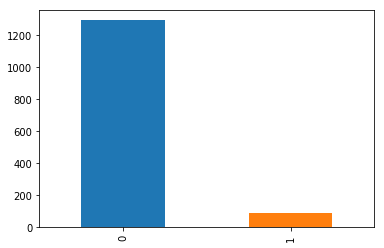

In [69]:
# Distribution Plot of Class 0 & 1
df["is_datascientist"].value_counts().plot.bar()  
plt.show()

In [70]:
# Identifying model baseline
baseline6 = len(df[df["is_datascientist"] == 0]) / len(df["is_datascientist"])
print("Baseline:", baseline6)

Baseline: 0.9342485549132948


In [71]:
# Using Job Description to predict whether Job is Data Scientist or not
X6 = df['Job Description']
y6 = df['is_datascientist']
desc1_train, desc1_test, y_train, y_test = train_test_split(X6, y6, test_size=0.3, random_state=91)

cvz = TfidfVectorizer(stop_words=stop, ngram_range=(1, 1), max_features=200)
stop += ["requirements", "work"]
desc1_train = cvz.fit_transform(desc1_train, y_train)
desc1_test = cvz.transform(desc1_test)

desc1_traindf = pd.DataFrame(desc1_train.toarray(), columns=cvz.get_feature_names(), index=X_train1.index)

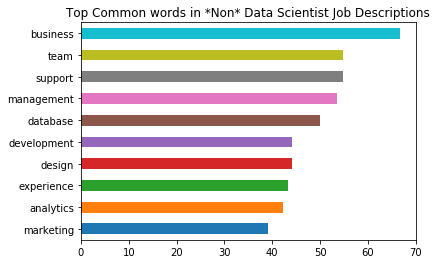

In [72]:
# Top 10 Common Words in "NON" Data Scientist Job Descriptions
desc_freq=desc1_traindf.loc[df["is_datascientist"] == 0].sum(axis=0)
desc_freq.sort_values(ascending = False).iloc[0:10].sort_values().plot(kind='barh')
plt.title('Top Common words in *Non* Data Scientist Job Descriptions')
plt.show()

#### Top 5 Common Words for Non Data Scientist Job Descriptions:
- business, team, support, management, database

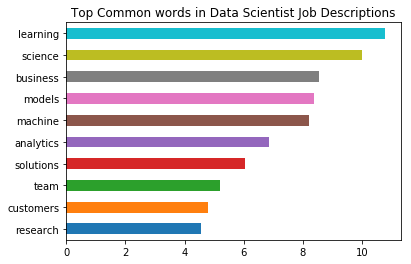

In [73]:
# Top 10 Common Words in Data Scientist Job Descriptions
desc_freq = desc1_traindf.loc[df["is_datascientist"] == 1].sum(axis=0)
desc_freq.sort_values(ascending = False).iloc[0:10].sort_values().plot(kind='barh')
plt.title('Top Common words in Data Scientist Job Descriptions')
plt.show()

#### Top 5 Common Words for Data Scientist Job Descriptions:
- learning, science, business, models, machine, analytics

In [74]:
# Modelling Time:
# To use Logistic Regression, Random Forest, KNearest models to see their performance

In [75]:
# Using Logistic Regression
lr = LogisticRegression(solver='liblinear', random_state=91)
C_vals = [.0001,.001,.01,.05, .1,.12,.13,.135,.15,.16,.17,1,3,5,10,20,50,100]
penalties = ['l1','l2']

# Using GridSearch to find best penalty and C parameters
gs = GridSearchCV(lr, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=5)
gs.fit(desc1_train, y_train)
print(gs.best_params_)
y_pred_lr6 = gs.best_estimator_.predict(desc1_test)
y_predp_lr6 = gs.best_estimator_.predict_proba(desc1_test)[:, 1]
print(classification_report(y_test, y_pred_lr6, target_names=["Others","Data Scientist"]))
roc_lr6 = roc_auc_score(y_test, y_predp_lr6)
print("ROC Score:", roc_lr6)

{'C': 3, 'penalty': 'l1'}
                precision    recall  f1-score   support

        Others       0.95      0.97      0.96       392
Data Scientist       0.38      0.25      0.30        24

     micro avg       0.93      0.93      0.93       416
     macro avg       0.67      0.61      0.63       416
  weighted avg       0.92      0.93      0.93       416

ROC Score: 0.8601721938775511


In [76]:
# Using Random Forest
rf = RandomForestClassifier(random_state=91)
rf.fit(desc1_train, y_train)
y_pred_rf6 = rf.predict(desc1_test)
y_predp_rf6 = rf.predict_proba(desc1_test)[:,1]
print(classification_report(y_test, y_pred_rf6, target_names=["Others","Data Scientist"]))
roc_rf6 = roc_auc_score(y_test, y_predp_rf6)
print("ROC Score:", roc_rf6)

                precision    recall  f1-score   support

        Others       0.95      0.99      0.97       392
Data Scientist       0.60      0.12      0.21        24

     micro avg       0.94      0.94      0.94       416
     macro avg       0.77      0.56      0.59       416
  weighted avg       0.93      0.94      0.93       416

ROC Score: 0.8056972789115646


In [77]:
# Using KNearest Neighbours
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(desc1_train, y_train)
y_pred_kn6 = knn.predict(desc1_test)
y_predp_kn6 = knn.predict_proba(desc1_test)[:,1]
print(classification_report(y_test, y_pred_kn6, target_names=["Others","Data Scientist"]))
roc_kn6 = roc_auc_score(y_test, y_predp_kn6)
print("ROC Score:", roc_kn6)

                precision    recall  f1-score   support

        Others       0.96      0.99      0.97       392
Data Scientist       0.55      0.25      0.34        24

     micro avg       0.94      0.94      0.94       416
     macro avg       0.75      0.62      0.66       416
  weighted avg       0.93      0.94      0.93       416

ROC Score: 0.8256271258503401


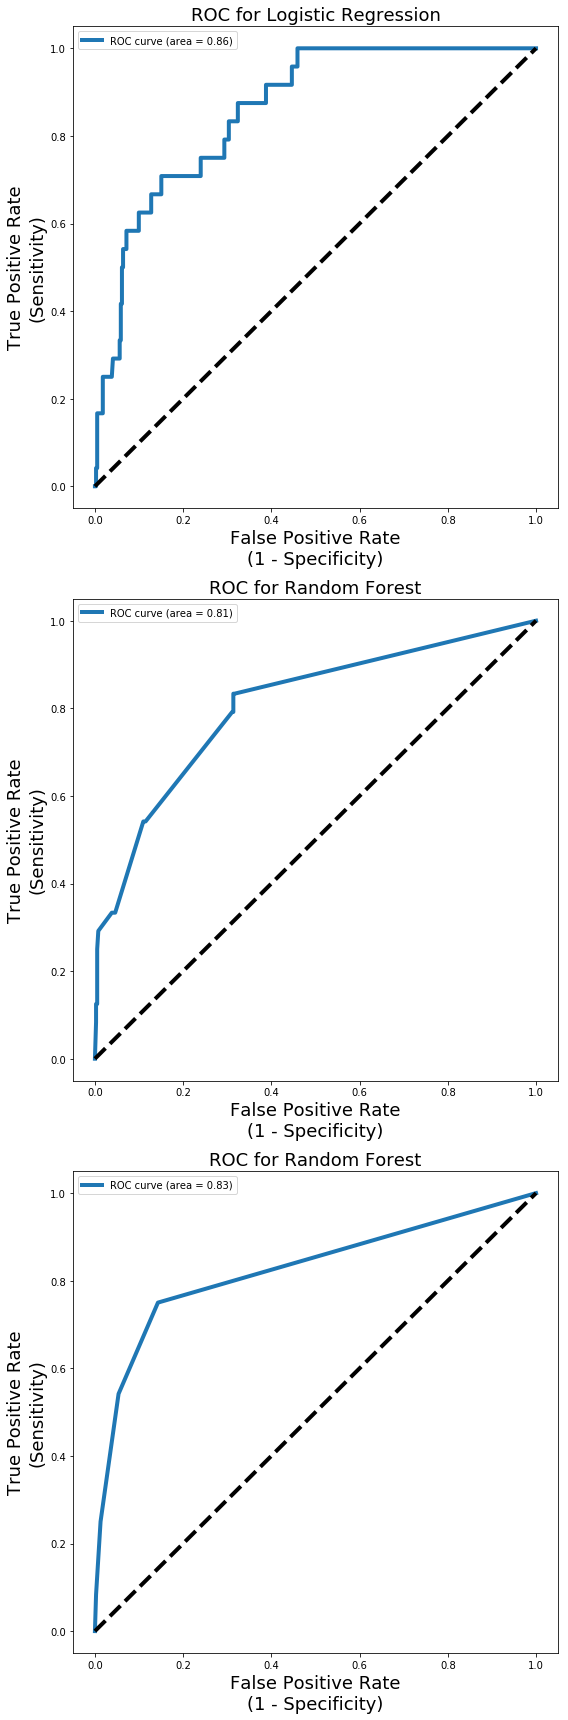

In [78]:
fig, ax = plt.subplots(3, 1, figsize=[8,24])

# Logistic Regression ROC Plot
plt.subplot(311)
fpr, tpr, _ = roc_curve(y_test, y_predp_lr6)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate\n(1 - Specificity)', fontsize=18)
plt.ylabel('True Positive Rate\n(Sensitivity)', fontsize=18)
plt.title('ROC for Logistic Regression', fontsize=18)
plt.legend(loc="best")

# Random Forest ROC Plot
plt.subplot(312)
fpr, tpr, _ = roc_curve(y_test, y_predp_rf6)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate\n(1 - Specificity)', fontsize=18)
plt.ylabel('True Positive Rate\n(Sensitivity)', fontsize=18)
plt.title('ROC for Random Forest', fontsize=18)
plt.legend(loc="best")

# KNearest ROC Plot
plt.subplot(313)
fpr, tpr, _ = roc_curve(y_test, y_predp_kn6)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate\n(1 - Specificity)', fontsize=18)
plt.ylabel('True Positive Rate\n(Sensitivity)', fontsize=18)
plt.title('ROC for Random Forest', fontsize=18)
plt.legend(loc="best")

plt.tight_layout()
plt.show()

In [79]:
pd.DataFrame([[roc_lr6, roc_rf6, roc_kn6],
              [baseline6, baseline6, baseline6]],
            columns=["LogisticReg", "RandomForest", "KNearest"],
            index=["ROC AUC Score", "Baseline"]).rename_axis('Summary:', axis=1)

Summary:,LogisticReg,RandomForest,KNearest
ROC AUC Score,0.860172,0.805697,0.825627
Baseline,0.934249,0.934249,0.934249


#### Conclusion:
- Logistic Regression Model was the better model to classify if the job title included Data Scientist or not, based on ROC Score.
- As the number of job titles containing Data Scientist was much lesser than that of non Data Scientists, it resulted in a unbalanced class distribution.
- Due to above, we should consider ROC score instead of Accuracy score to determine the model's performance.

#### What components of a job posting distinguish data scientists from other data jobs? 

In [158]:
X7 = df[df["is_datascientist"] == 1]['Job Description']

In [159]:
# **********   NLP - Topic Modelling (First Part Only) **********  

# Using job description we can identify main component of a job posting distinguish data scientists from other data jobs

from gensim import corpora, models, matutils
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import defaultdict

#### Using STOP WORDS #### 

from nltk.corpus import stopwords
import nltk

# Use stop word from NLTK

nltk.download('stopwords')
nltk_stops = stopwords.words()

# Use stop word from SKLearn
custom_stop_words = list(ENGLISH_STOP_WORDS)
custom_stop_words.append('job')
custom_stop_words.append("role")
custom_stop_words.append("work")

# Fit and Transform using sklearn stop word.
vectorizer = CountVectorizer(stop_words=custom_stop_words)
X = vectorizer.fit_transform(X7)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [160]:
# Use Vocabulary - parameter of CountVectorizer
# `.vocabulary_` attribute of the vectorizer contains a dictionary of terms. 

vectorizer.vocabulary_
vectorizer.get_feature_names()

# Get counts of tokens.
docs = pd.DataFrame(X.todense(), 
                    columns=vectorizer.get_feature_names())
docs.sum().sort_values(ascending=False).head(10)

data         534
business     188
learning     169
analytics    129
machine      118
team         116
solutions    110
models       102
science       95
develop       65
dtype: int64

In [ ]:
learning, science, business, models, machine, analytics

##### From job description, we can conclude the word  "data", "business", "learning", "analytics", "machine"  is a major factor for data scientist related job. These words are almost in line with the earlier result  under section "Top 5 Common Words for Data Scientist Job Descriptions"

-----

#### What features are important for distinguishing junior vs. senior positions?

In [170]:
# Using job requirement, we can identify features that are important for distinguishing senior vs junior position
X8 = df[df["Senior Management"] == 1]['Job Requirements']

In [173]:
# Fit and Transform using sklearn stop word.
vectorizer = CountVectorizer(stop_words=custom_stop_words)
X = vectorizer.fit_transform(X8)
docs = pd.DataFrame(X.todense(), 
                    columns=vectorizer.get_feature_names())
docs.sum().sort_values(ascending=False).head(10)

experience     167
data           141
skills          84
business        79
development     72
management      60
years           55
strong          54
knowledge       53
ability         53
dtype: int64

##### From job requirements' counts of tokens, it is logical to conclude that more "Experience",  "Data", "Skills", "Business", "Management" would be the deciding factor between a senior roles and non senior roles. 

-----

##### Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

In [195]:
# Using job requirement, we can identify features that are important for distinguishing senior vs junior position
X9 = df[df["Healthcare / Pharmaceutical"] == 1]['Job Requirements']
# Fit and Transform using sklearn stop word.
vectorizer = CountVectorizer(stop_words=custom_stop_words)
X = vectorizer.fit_transform(X9)
docs = pd.DataFrame(X.todense(), 
                    columns=vectorizer.get_feature_names())
docs.sum().sort_values(ascending=False).head(10)

experience    16
ensure         7
clinical       6
medical        6
degree         6
maintain       5
local          5
assigned       5
relevant       5
design         5
dtype: int64

In [196]:
# Using job requirement, we can identify features that are important for distinguishing senior vs junior position
X10 = df[df["Public / Civil Service"] == 1]['Job Requirements']
# Fit and Transform using sklearn stop word.
vectorizer = CountVectorizer(stop_words=custom_stop_words)
X = vectorizer.fit_transform(X10)
docs = pd.DataFrame(X.todense(), 
                    columns=vectorizer.get_feature_names())
docs.sum().sort_values(ascending=False).head(10)

microsoft     2
nitec         2
office        2
proficient    2
www           1
gce           1
higher        1
good          1
english       1
inform        1
dtype: int64

##### From first glance, "Healthcare" jobs has higher qualification requirement in the area of clinical and medical sector, where as governement jobs requirement is GCE level only. 

##### But this is inconclusive as there is insufficient data on "Public / Civil Service". Many job requirement in this sector is blank (null). This is because most government jobs will be forwarded to their respective gov/corporate websites. Most investigation is needed. 

-----

vocab = ["r", "c++", "java", "javascript", "python", "alteryx", "analytics", "visualization", "mysql", "sqlite",
         "sql", "tableau", ".net", "c#", "etl", "powerbi", "machine", "learning", "informatica", "oracle", "rds",
         "stata", "edm", "xml", "sas", "sybase", "sap", "datawarehouse", "data warehouse", "aws", "acess", "redis",
         "excel", "hadoop", "hive", "spark", "scala", "nosql", "nlp", "azure", "netezza", "gcp", "Informatix", "DB2",
         "Robomongo", "mapreduce", "rdbms", "matlab", "mssql", "mongodb", "predictive", "model", "teradata", "PostgreSQL",
         "powerpoint", "sharepoint", "cognos", "business objects", "database", "data store", "couchdb"]